## AISC2004 - InClassAssignmnet 5 - Data Analysis in Python
Group Name : Group D

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

C:\Users\kruta\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\kruta\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\kruta\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
color_palette = {'Brampton': 'red', 'Alabama': 'blue', 'Paris': 'lightgreen'}
data = pd.read_excel('Data.xlsx')
data

,Month,Cars_produced,Average_price,Location
0,January,2100,19800.00,Alabama
1,February,3053,17870.00,Alabama
2,March,2526,17770.00,Alabama
3,April,3499,17630.00,Alabama
4,May,3705,17145.90,Alabama
5,June,3600,16080.00,Alabama
6,July,3309,17679.00,Alabama
7,August,3212,17550.60,Alabama
8,September,2900,17847.40,Alabama
9,October,2500,18002.00,Alabama


## Data Preprocessing

In [3]:
# # Dictionary mapping month names to their corresponding numeric values
# month_to_number = {
#     'January': 1,
#     'February': 2,
#     'March': 3,
#     'April': None,
#     'May': 5,
#     'June': 6,
#     'July': 7,
#     'August': 8,
#     'September': 9,
#     'October': 10,
#     'November': 11,
#     'December': 12
# }

# Dictionary mapping month names to their corresponding numeric values
month_to_number = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Convert the month names to numeric values
data['Month_Num'] = data['Month'].map(month_to_number)

print(data)

        Month  Cars_produced  Average_price  Location  Month_Num
0     January           2100       19800.00   Alabama          1
1    February           3053       17870.00   Alabama          2
2       March           2526       17770.00   Alabama          3
3       April           3499       17630.00   Alabama          4
4         May           3705       17145.90   Alabama          5
5        June           3600       16080.00   Alabama          6
6        July           3309       17679.00   Alabama          7
7      August           3212       17550.60   Alabama          8
8   September           2900       17847.40   Alabama          9
9     October           2500       18002.00   Alabama         10
10   November           2400       19365.00   Alabama         11
11   December           1900       22057.00   Alabama         12
12    January            950       29700.00     Paris          1
13   February           1500       26950.00     Paris          2
14      March           1

In [4]:
# Convert the month names to numeric values using the dictionary and handle NaN values
data['Month_Num'] = data['Month'].map(month_to_number).fillna(0).astype(int)
data['Month_Num']

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12     1
13     2
14     3
15     4
16     5
17     6
18     7
19     8
20     9
21    10
22    11
23    12
24     1
25     2
26     3
27     4
28     5
29     6
30     7
31     8
32     9
33    10
34    11
35    12
Name: Month_Num, dtype: int32

In [5]:
# Handle the case where Month_Num is 0 (unknown or NaN) and set a default month (e.g., January)
data.loc[data['Month_Num'] == 0, 'Month_Num'] = 1

# Create a new date column using the numeric month and a fixed year (e.g., 2023)
data['Date'] = pd.to_datetime(data['Month_Num'].astype(str) + "/2022", format='%m/%Y')

# Optional: Drop the intermediate column 'Month_Num' if you don't need it anymore
data.drop(columns=['Month_Num'], inplace=True)

# df = pd.DataFrame(data)
# print(df)

data.head()


,Month,Cars_produced,Average_price,Location,Date
0,January,2100,19800.0,Alabama,2022-01-01
1,February,3053,17870.0,Alabama,2022-02-01
2,March,2526,17770.0,Alabama,2022-03-01
3,April,3499,17630.0,Alabama,2022-04-01
4,May,3705,17145.9,Alabama,2022-05-01


In [6]:
# filterdata = data[['Cars_produced','Date','Location','Average_price']]
filterdata = data.drop('Month', axis=1)
filterdata.head()

,Cars_produced,Average_price,Location,Date
0,2100,19800.0,Alabama,2022-01-01
1,3053,17870.0,Alabama,2022-02-01
2,2526,17770.0,Alabama,2022-03-01
3,3499,17630.0,Alabama,2022-04-01
4,3705,17145.9,Alabama,2022-05-01


In [7]:
cost_of_production_per_car = {
    'Alabama': 14000.00,
    'Paris': 17050.00,
    'Brampton': 11702.50
}

filterdata['Cost_of_Production'] = filterdata['Location'].map(cost_of_production_per_car)
# Calculate Total Cost, Revenue, and Profit
filterdata['Total_Cost'] = filterdata['Cars_produced'] * filterdata['Cost_of_Production']
filterdata['Revenue'] = filterdata['Cars_produced'] * filterdata['Average_price']
filterdata['Profit_by_month'] = filterdata['Revenue'] - filterdata['Total_Cost']
filterdata.head()

,Cars_produced,Average_price,Location,Date,Cost_of_Production,Total_Cost,Revenue,Profit_by_month
0,2100,19800.0,Alabama,2022-01-01,14000.0,29400000.0,41580000.0,12180000.0
1,3053,17870.0,Alabama,2022-02-01,14000.0,42742000.0,54557110.0,11815110.0
2,2526,17770.0,Alabama,2022-03-01,14000.0,35364000.0,44887020.0,9523020.0
3,3499,17630.0,Alabama,2022-04-01,14000.0,48986000.0,61687370.0,12701370.0
4,3705,17145.9,Alabama,2022-05-01,14000.0,51870000.0,63525559.5,11655559.5


In [8]:
file_nme = 'dst_data.csv'
filterdata.to_csv(file_nme, index=False)
print(file_nme)

dst_data.csv


In [9]:
filterdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cars_produced,36.0,1.891389e+03,8.168618e+02,800.0,1.337500e+03,1526.00,2.425000e+03,3705.0
Average_price,36.0,2.487865e+04,5.285270e+03,16080.0,1.902425e+04,26364.48,2.832060e+04,35255.0
Cost_of_Production,36.0,1.425083e+04,2.221371e+03,11702.5,1.170250e+04,14000.00,1.705000e+04,17050.0
Total_Cost,36.0,2.682956e+07,1.176638e+07,13640000.0,1.689548e+07,25148750.00,3.395000e+07,51870000.0
Revenue,36.0,4.323916e+07,8.982816e+06,28204000.0,3.789788e+07,41308080.00,4.626776e+07,63525559.5
Profit_by_month,36.0,1.640960e+07,4.904429e+06,7488000.0,1.217845e+07,15686709.50,2.048090e+07,28312500.0


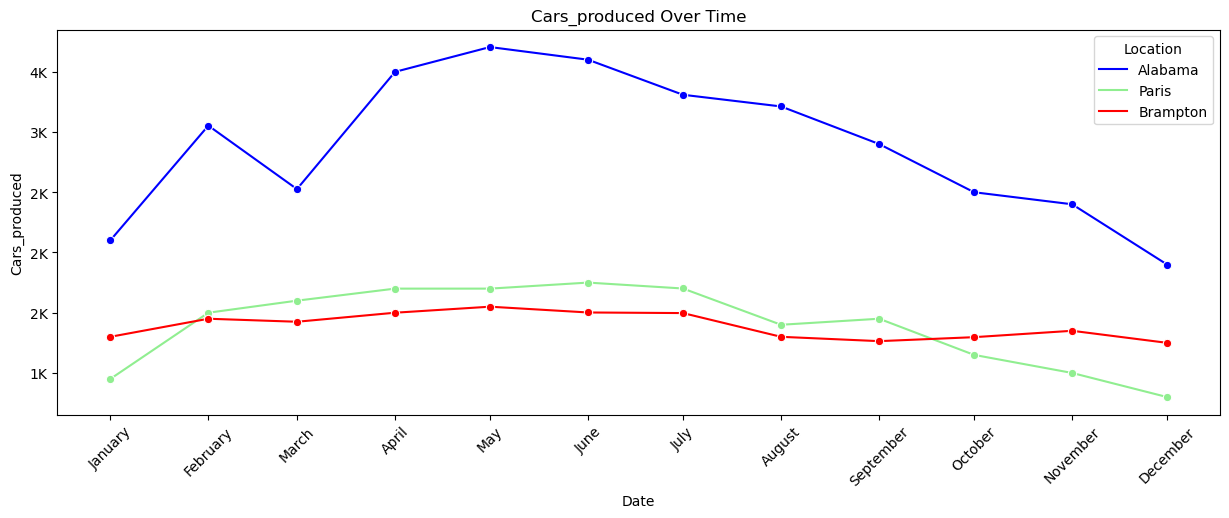

In [10]:
import matplotlib.ticker as mticker
# Plot the data
color_pal = sns.color_palette()
plt.figure(figsize=(15, 5))
sns.lineplot(data=filterdata, x='Date', y='Cars_produced', marker='o',hue='Location',palette=color_palette)
# Format the y-axis tick labels to display values in thousands
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))
# plt.plot(filterdata['Date'], filterdata['Cars_produced'], marker='.', color=color_pal[0])
plt.title('Cars_produced Over Time')
plt.xlabel('Date')
plt.ylabel('Cars_produced')
# Set x-axis ticks and labels to show all the months
plt.xticks(data['Date'].unique(), data['Month'].unique(), rotation=45)
plt.show()

* From the above graph, we can see that we can see the Alabama has the higest car producer

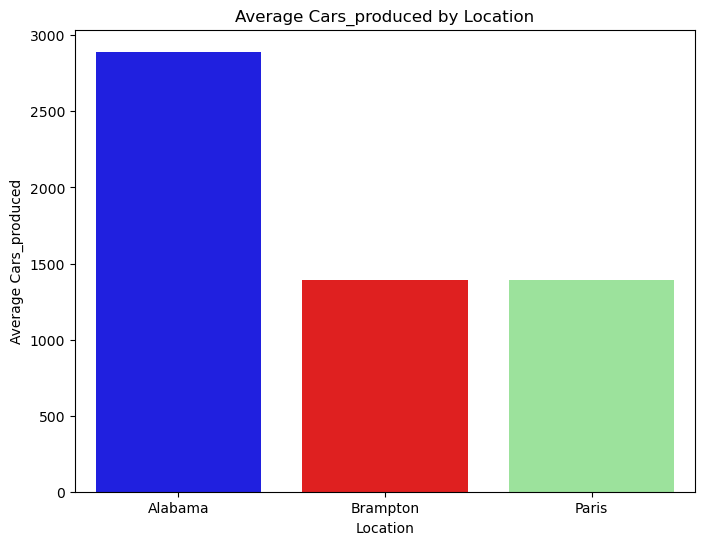

In [11]:
# Calculate the average number of Cars_produced by Location
average_Cars_produced_by_Location = filterdata.groupby('Location')['Cars_produced'].mean().reset_index()

# Convert 'Cars_produced' to thousands
# average_Cars_produced_by_Location['Cars_produced'] = average_Cars_produced_by_Location['Cars_produced'] / 1000
# Plot the average Cars_produced by Location using Seaborn
plt.figure(figsize=(8, 6))
# plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))
sns.barplot(data=average_Cars_produced_by_Location, x='Location', y='Cars_produced', palette=color_palette)
plt.title('Average Cars_produced by Location')
plt.xlabel('Location')
plt.ylabel('Average Cars_produced')
plt.show()

* Above graph depicts the Average number of cars produced over different locations in 1 year, where Alabama is the highest.

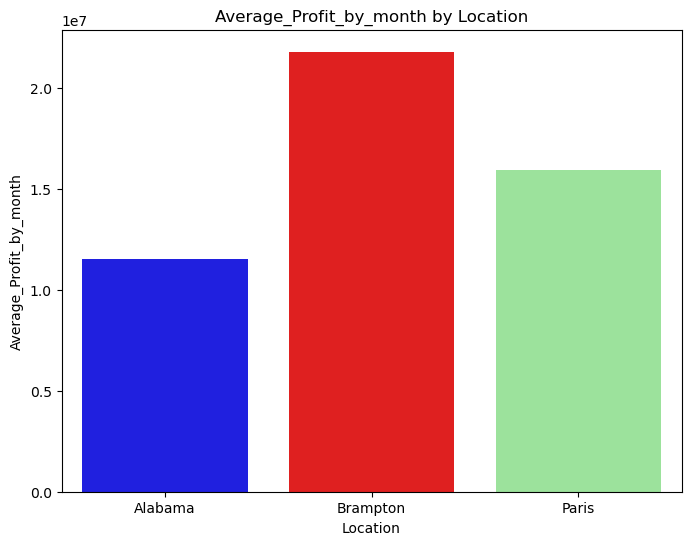

In [12]:
avg_profit_by_month_by_Location = filterdata.groupby('Location')['Profit_by_month'].mean().reset_index()
# Plot the average Cars_produced by Location using Seaborn
plt.figure(figsize=(8, 6))
# plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))
sns.barplot(data=avg_profit_by_month_by_Location, x='Location', y='Profit_by_month', palette=color_palette)
plt.title('Average_Profit_by_month by Location')
plt.xlabel('Location')
plt.ylabel('Average_Profit_by_month')
plt.show()

* Above graph depicts the Average Profit generated per month over different locations in 1 year, where Brampton is the highest and Alabama is the lowest.

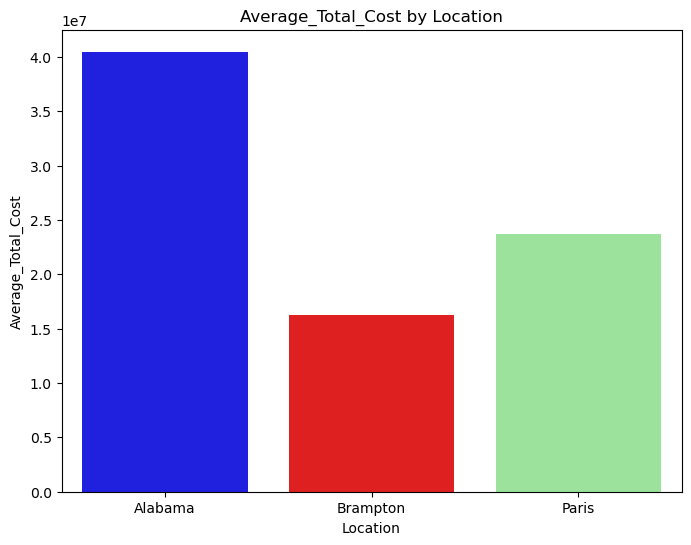

In [13]:
avg_profit_by_month_by_Location = filterdata.groupby('Location')['Total_Cost'].mean().reset_index()
# Plot the average Cars_produced by Location using Seaborn
plt.figure(figsize=(8, 6))
# plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))
sns.barplot(data=avg_profit_by_month_by_Location, x='Location', y='Total_Cost', palette=color_palette)
plt.title('Average_Total_Cost by Location')
plt.xlabel('Location')
plt.ylabel('Average_Total_Cost')
plt.show()

* Above graph depicts the Average total cost invested in car production over different locations in 1 year, where Alabama is the highest and Brampton is the lowest.

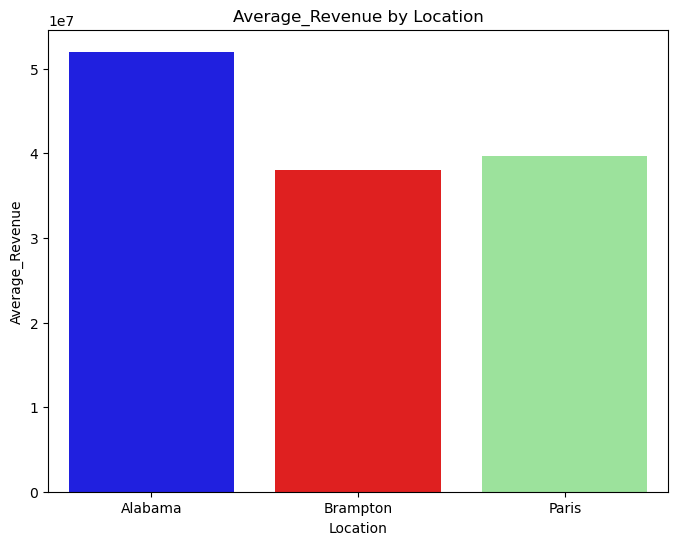

In [14]:
avg_Revenue_by_Location = filterdata.groupby('Location')['Revenue'].mean().reset_index()
# Plot the average Cars_produced by Location using Seaborn
plt.figure(figsize=(8, 6))
# plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))
sns.barplot(data=avg_Revenue_by_Location, x='Location', y='Revenue', palette=color_palette)
plt.title('Average_Revenue by Location')
plt.xlabel('Location')
plt.ylabel('Average_Revenue')
plt.show()

* Above graph depicts the Average revenue invested over different locations in 1 year, where Alabama is the highest and Brampton is the lowest.

In [15]:
filterdata.columns

Index(['Cars_produced', 'Average_price', 'Location', 'Date',
       'Cost_of_Production', 'Total_Cost', 'Revenue', 'Profit_by_month'],
      dtype='object')

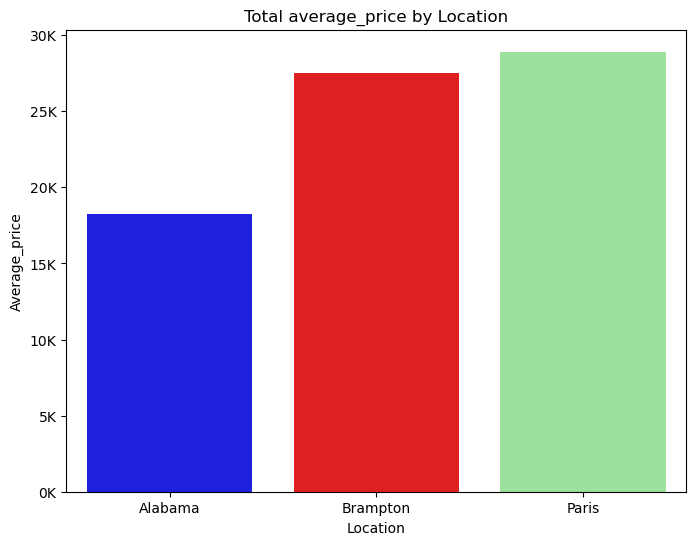

In [16]:
total_Average_price_by_Location = filterdata.groupby('Location')['Average_price'].mean().reset_index()
# Plot the average Cars_produced by Location using Seaborn
plt.figure(figsize=(8, 6))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))
sns.barplot(data=total_Average_price_by_Location, x='Location', y='Average_price', palette=color_palette)
plt.title('Total average_price by Location')
plt.xlabel('Location')
plt.ylabel('Average_price')
plt.show()

* From the above graph we can see that total average price(Cost Price) which higest in Paris and lowest in Alabama.

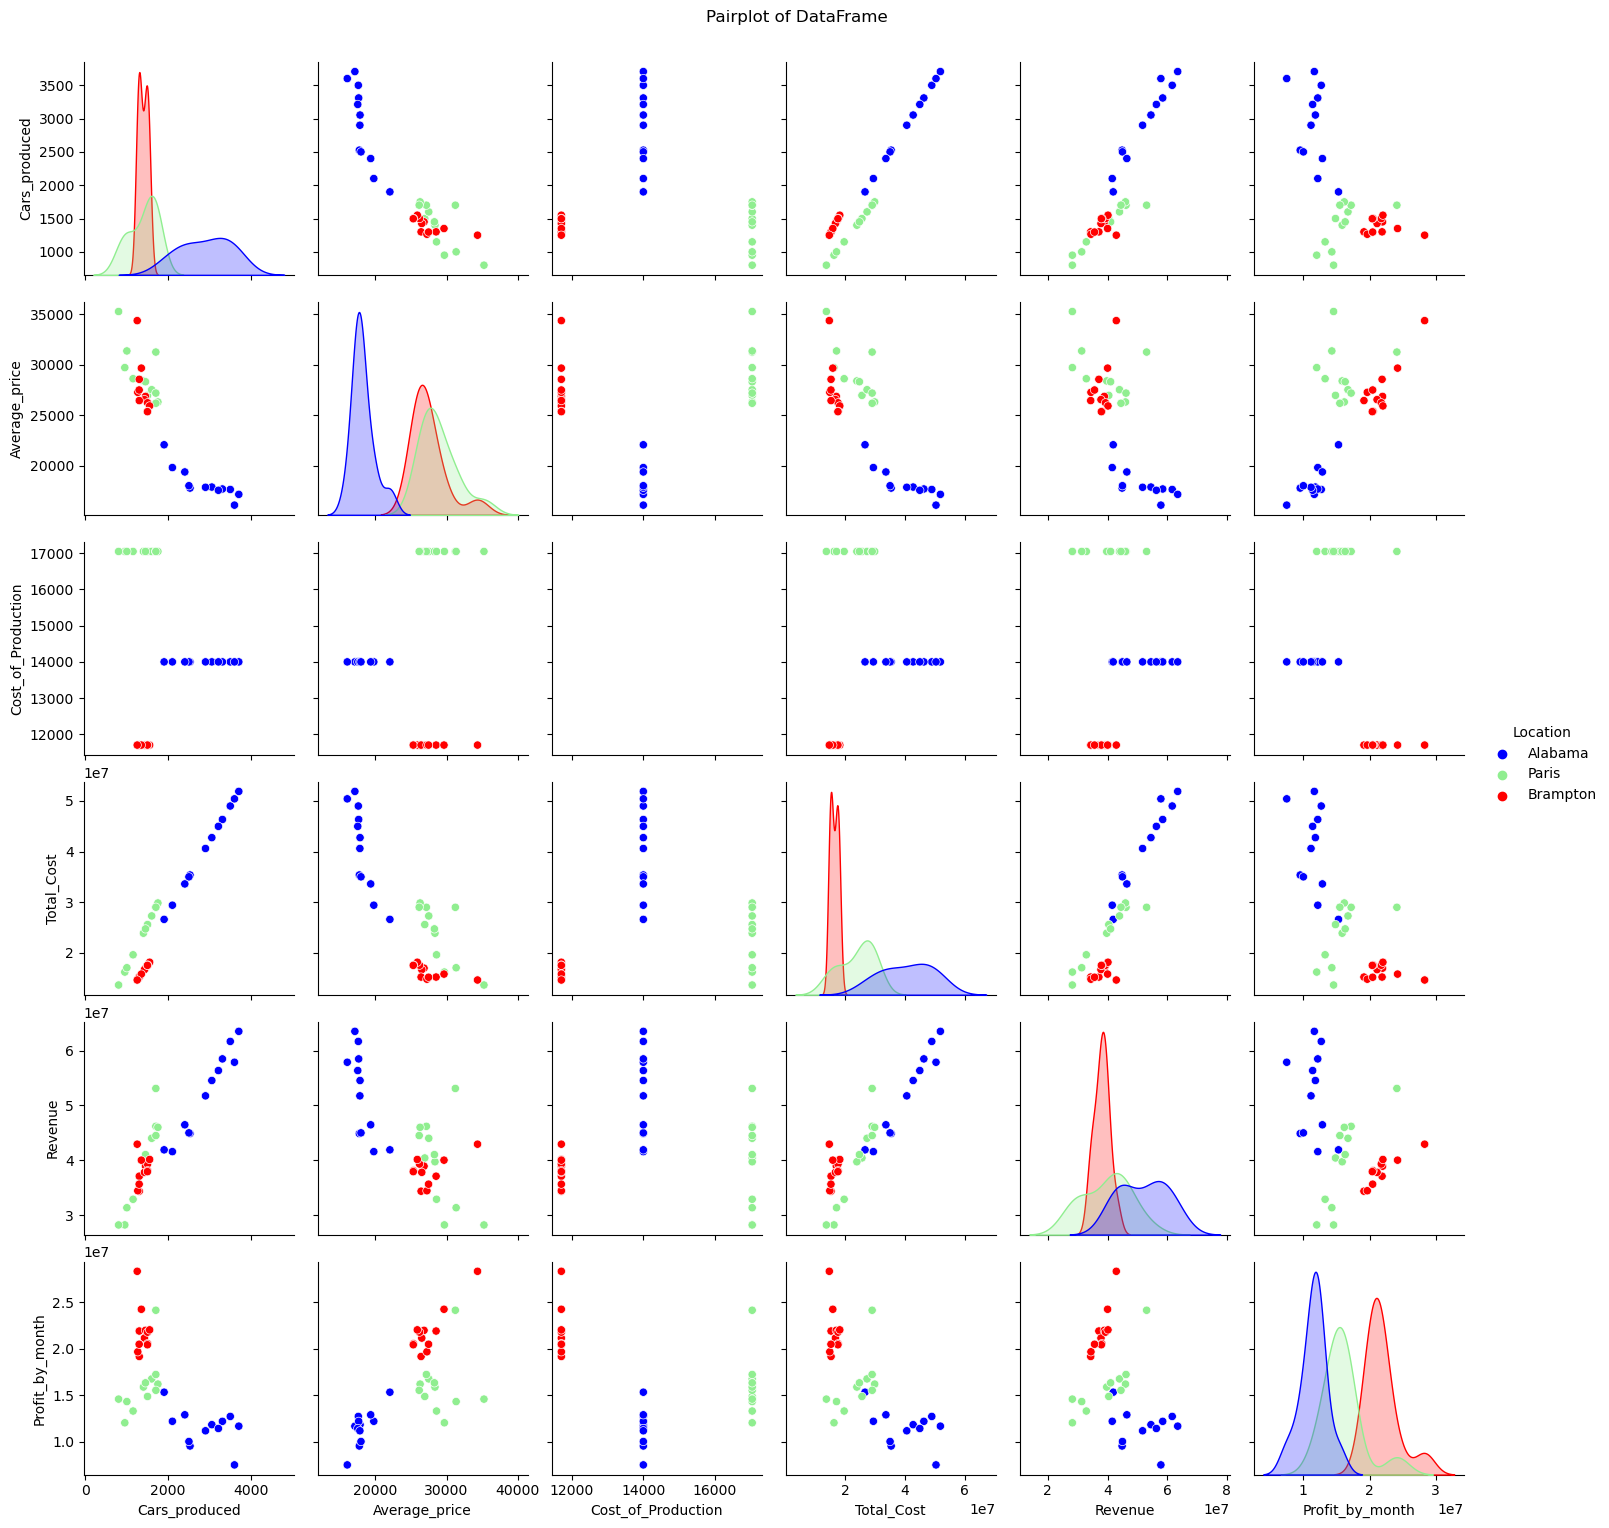

In [17]:
#multivariate analysis
sns.pairplot(filterdata, hue='Location', palette=color_palette)
plt.suptitle('Pairplot of DataFrame', y=1.02)
plt.show()

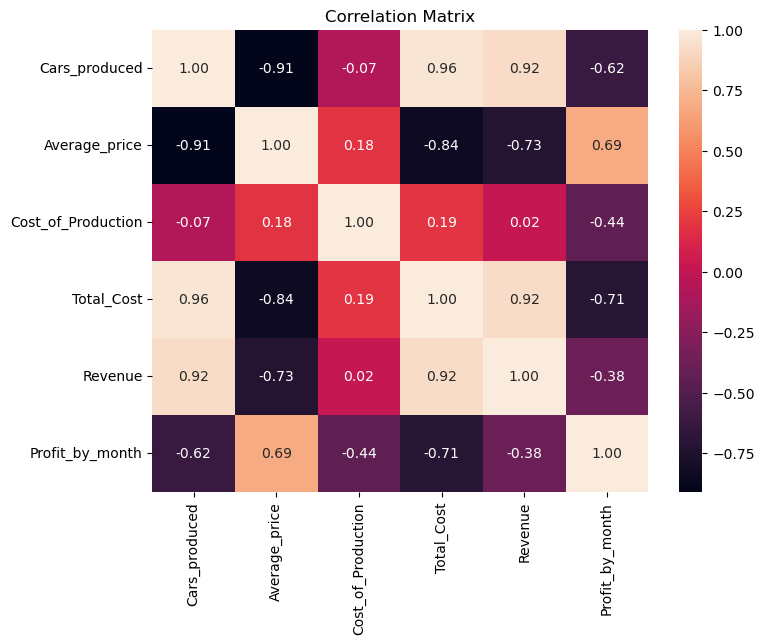

In [18]:
correlation_matrix = filterdata.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

* From the above correlation matrix, we can observe that :
1) Total Cost highly correlated with revenue and produced cars, negatively correlated with Profit_by_month, Average price.
2) Average price and Profit by month are moderately correlated and with revenue,total cost and produced cars is negatively correlated.

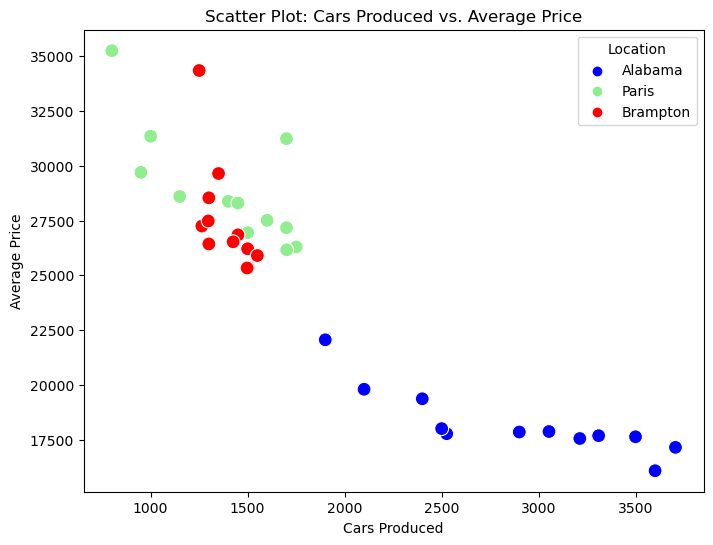

In [19]:
# Cars Produced vs. Average Price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filterdata, x='Cars_produced', y='Average_price', hue='Location', palette=color_palette, s=100)
plt.title('Scatter Plot: Cars Produced vs. Average Price')
plt.xlabel('Cars Produced')
plt.ylabel('Average Price')
plt.legend(title='Location')
plt.show()

* From the above plot we can see that , it is easy and affordable to buy car in Alabama in comparison to other two whihc might be due to the location of the company. The price of of car in Brampton and Canada are nearly same which might be due to transportation of the company.

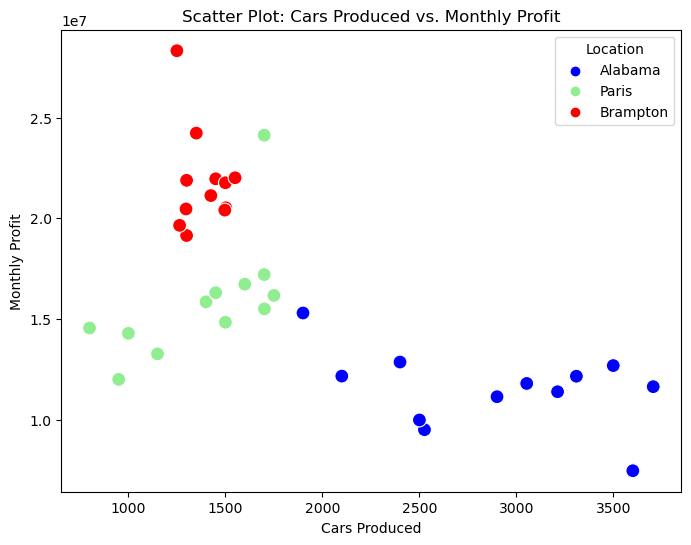

In [20]:
# 1. Scatter Plot: Cars Produced vs. Average Price
#bivariate
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filterdata, x='Cars_produced', y='Profit_by_month', hue='Location', palette=color_palette, s=100)
plt.title('Scatter Plot: Cars Produced vs. Monthly Profit')
plt.xlabel('Cars Produced')
plt.ylabel('Monthly Profit')
plt.legend(title='Location')
plt.show()

* We are getting the highest profit for the cars produced in Brampton and Alabama has the lowset profit.

In [21]:
# Get the neumerical columns and categorical columns from the dataframe named "data"
numerical_cols = [column for column in filterdata.columns if filterdata[column].dtype!= 'O']
print("COLUMNS OF DATAFRAME WITH NUMMERICAL DATA TYPE : ")
print(numerical_cols)
categorical_cols = list(set(list(filterdata.columns)) - set(numerical_cols))
print("COLUMNS OF DATAFRAME WITH STRING DATA TYPE : ")
print(categorical_cols)

COLUMNS OF DATAFRAME WITH NUMMERICAL DATA TYPE : 
['Cars_produced', 'Average_price', 'Date', 'Cost_of_Production', 'Total_Cost', 'Revenue', 'Profit_by_month']
COLUMNS OF DATAFRAME WITH STRING DATA TYPE : 
['Location']


## Exploratory Data Analysis

In [22]:
def dist_plot(feature,feature_name,Location):
    plt.figure(figsize=(18,6),dpi=100)
    plt.subplot(1,2,1)
    ax = sns.histplot(feature, kde=True,palette=color_palette)
    # Calculate mean and median
    mean = feature.mean()
    median = feature.median()
    # Add mean and median annotations
    ax.axvline(mean, color='red', linestyle='--', label='Mean')
    ax.axvline(median, color='green', linestyle='-', label='Median')
    print(f"Mean {feature_name} for {Location}: {mean:.2f}")
    print(f"Median {feature_name} for {Location}: {median:.2f}")
    
    plt.legend()
    plt.subplot(1,2,2)
    sns.boxplot(data=feature,showmeans=True,color='aqua')
    plt.title(feature_name)
    # Show the plot
    plt.show()


AttributeError: 'str' object has no attribute 'mean'

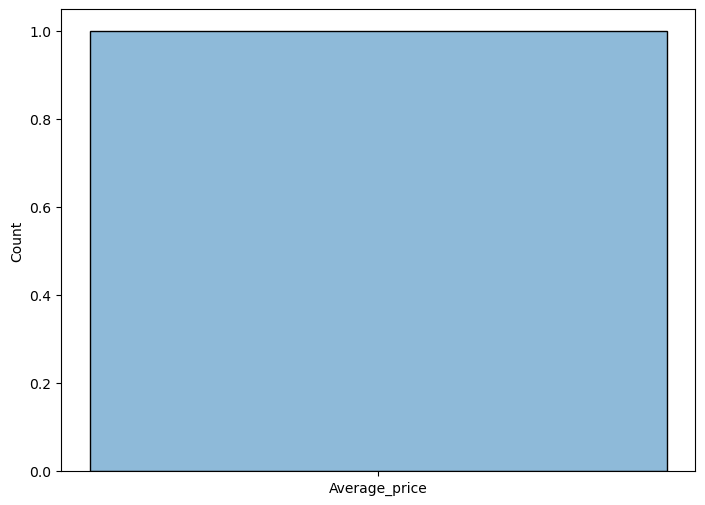

In [26]:
# dist_plot('Average_price', 'Production', 'Paris')

In [36]:
# #-------------------for understanding-------------------------------------------
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Sample data (replace this with your actual data)
# data = pd.DataFrame({'SomeFeature': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70], 'Location': ['Brampton'] * 10})

# # Define color palette
# color_palette = {'Brampton': 'red', 'Alabama': 'blue', 'Paris': 'lightgreen'}

# # Define the dist_plot function
# def dist_plot(feature, feature_name, Location):
#     plt.figure(figsize=(18, 6), dpi=100)
#     plt.subplot(1, 2, 1)
#     ax = sns.histplot(feature, kde=True, palette=color_palette)
#     # Calculate mean and median
#     mean = feature.mean()
#     median = feature.median()
#     # Add mean and median annotations
#     ax.axvline(mean, color='red', linestyle='--', label='Mean')
#     ax.axvline(median, color='green', linestyle='-', label='Median')
#     print(f"Mean {feature_name} for {Location}: {mean:.2f}")
#     print(f"Median {feature_name} for {Location}: {median:.2f}")

#     plt.legend()
#     plt.subplot(1, 2, 2)
#     sns.boxplot(data=feature, showmeans=True, color='aqua')
#     plt.title(feature_name)
#     # Show the plot
#     plt.show()

# # Example usage
# dist_plot(data['SomeFeature'], 'SomeFeature', 'Brampton')


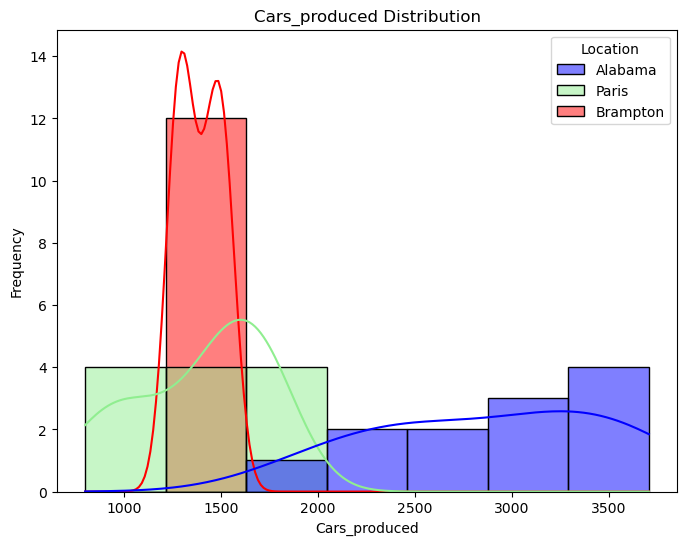

In [31]:
#univariate analysis 
plt.figure(figsize=(8, 6))
sns.histplot(data=filterdata, x='Cars_produced',hue='Location' ,kde=True,palette=color_palette)
plt.title('Cars_produced Distribution')
plt.xlabel('Cars_produced')
plt.ylabel('Frequency')
plt.show()

In [32]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Custom color palette for specific locations
# color_palette = {'Brampton': 'red', 'Alabama': 'blue', 'Paris': 'lightgreen'}

# def dist_plot(feature,feature_name,Location):
#     plt.figure(figsize=(18,6),dpi=100)
#     plt.subplot(1,2,1)
#     ax = sns.distplot(feature, kde=True)
#     # Calculate mean and median
#     mean = feature.mean()
#     median = feature.median()
#     # Add mean and median annotations
#     ax.axvline(mean, color='red', linestyle='--', label='Mean')
#     ax.axvline(median, color='green', linestyle='-', label='Median')
#     print(f"Mean {feature_name} for {Location}: {mean:.2f}")
#     print(f"Median {feature_name} for {Location}: {median:.2f}")
    
#     plt.legend()
#     plt.subplot(1,2,2)
#     sns.boxplot(data=feature,showmeans=True,color='aqua')
#     plt.title(feature_name)
#     # Show the plot
#     plt.show()

In [33]:
filterdata[filterdata['Location'] == 'Alabama']

,Cars_produced,Average_price,Location,Date,Cost_of_Production,Total_Cost,Revenue,Profit_by_month
0,2100,19800.0,Alabama,2022-01-01,14000.0,29400000.0,41580000.0,12180000.0
1,3053,17870.0,Alabama,2022-02-01,14000.0,42742000.0,54557110.0,11815110.0
2,2526,17770.0,Alabama,2022-03-01,14000.0,35364000.0,44887020.0,9523020.0
3,3499,17630.0,Alabama,2022-04-01,14000.0,48986000.0,61687370.0,12701370.0
4,3705,17145.9,Alabama,2022-05-01,14000.0,51870000.0,63525559.5,11655559.5
5,3600,16080.0,Alabama,2022-06-01,14000.0,50400000.0,57888000.0,7488000.0
6,3309,17679.0,Alabama,2022-07-01,14000.0,46326000.0,58499811.0,12173811.0
7,3212,17550.6,Alabama,2022-08-01,14000.0,44968000.0,56372527.2,11404527.2
8,2900,17847.4,Alabama,2022-09-01,14000.0,40600000.0,51757460.0,11157460.0
9,2500,18002.0,Alabama,2022-10-01,14000.0,35000000.0,45005000.0,10005000.0


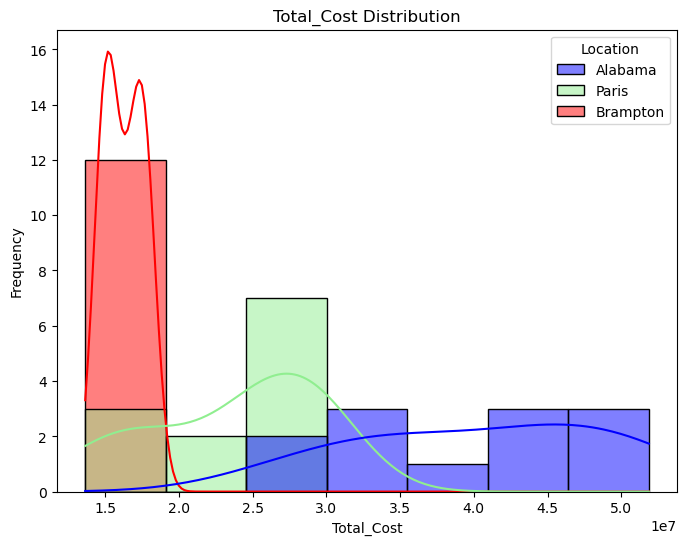

In [34]:
plt.figure(figsize=(8, 6))
sns.histplot(data=filterdata, x='Total_Cost',hue='Location' ,kde=True,palette=color_palette)
plt.title('Total_Cost Distribution')
plt.xlabel('Total_Cost')
plt.ylabel('Frequency')
plt.show()

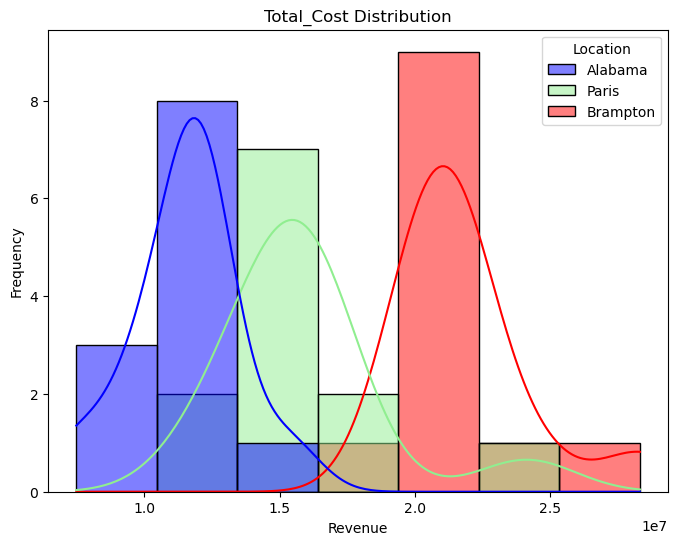

In [38]:
#33333333333333333333333333
plt.figure(figsize=(8, 6))
sns.histplot(data=filterdata, x='Profit_by_month',hue='Location' ,kde=True,palette=color_palette)
plt.title('Total_Cost Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

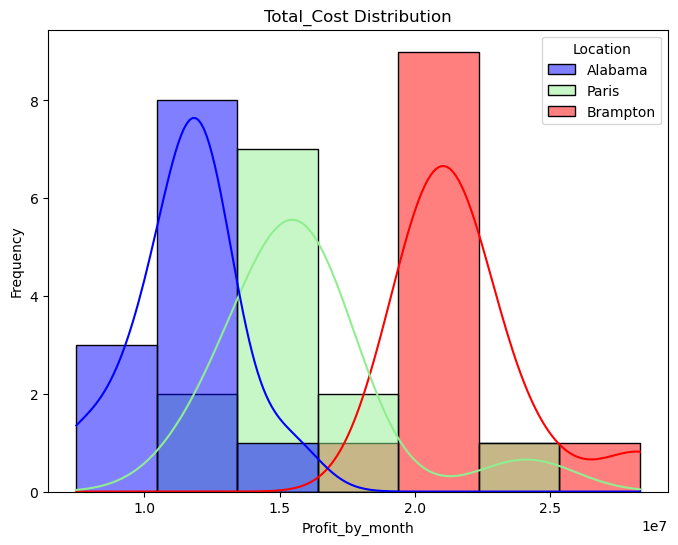

In [35]:
plt.figure(figsize=(8, 6))
sns.histplot(data=filterdata, x='Profit_by_month',hue='Location' ,kde=True,palette=color_palette)
plt.title('Total_Cost Distribution')
plt.xlabel('Profit_by_month')
plt.ylabel('Frequency')
plt.show()

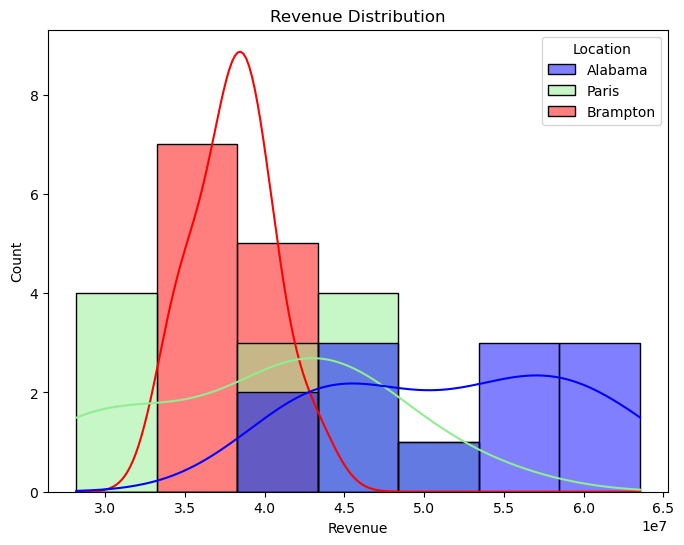

In [45]:
plt.figure(figsize=(8, 6))
sns.histplot(data=filterdata, x='Revenue',hue='Location' ,kde=True,palette=color_palette)
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
# plt.ylabel('Frequency')
plt.show()

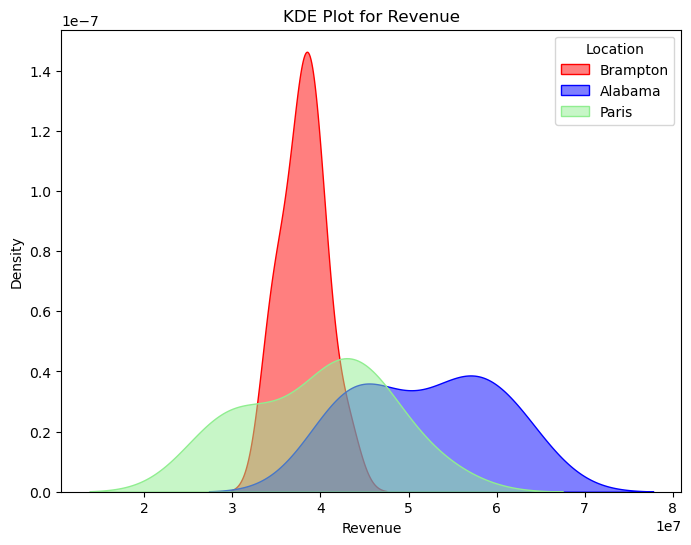

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'filterdata' is your DataFrame

# Custom color palette for specific locations
color_palette = {'Brampton': 'red', 'Alabama': 'blue', 'Paris': 'lightgreen'}

# Create the KDE plot for each location separately
plt.figure(figsize=(8, 6))
for location, color in color_palette.items():
    sns.kdeplot(data=filterdata[filterdata['Location'] == location], x='Revenue', fill=True, hue='Location', palette={location: color}, alpha=0.5, kernel='gaussian')

plt.title('KDE Plot for Revenue')
plt.xlabel('Revenue')
plt.legend(title='Location', labels=color_palette.keys())  # Set the legend title and labels
plt.show()


## Revenue Vs Total_Cost

<Figure size 1000x600 with 0 Axes>

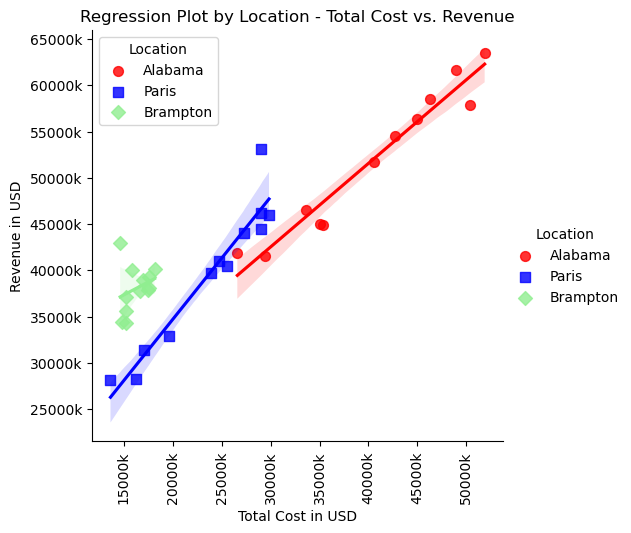

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'filterdata' is your DataFrame

# Custom scaling function to display values in thousands
def scale_to_thousands(x):
    return x / 1000

# Create the Regression Plot by Location
plt.figure(figsize=(10, 6))
sns.lmplot(data=filterdata, x='Total_Cost', y='Revenue', hue='Location', scatter_kws={'s': 50}, markers=['o', 's', 'D'],palette=color_palette.values())

# Scale the x and y-axis ticks to display in thousands
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1000:.0f}k'))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y/1000:.0f}k'))

plt.xlabel('Total Cost in USD')
plt.ylabel('Revenue in USD')
plt.title('Regression Plot by Location - Total Cost vs. Revenue')
plt.legend(title='Location')
plt.xticks(rotation=90)
plt.show()

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

def reg_plots(x, y):
    color_palette = {'Brampton': 'red', 'Alabama': 'blue', 'Paris': 'lightgreen'}
    plt.figure(figsize=(10, 6))
    sns.lmplot(data=filterdata, x=x, y=y, hue='Location', scatter_kws={'s': 50}, markers=['o', 's', '+'],palette=color_palette)

    # Scale the x and y-axis ticks to display in thousands
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1000:.0f}k'))
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y/1000:.0f}k'))

    plt.xlabel('{} '.format(x))
    plt.ylabel('{} in USD'.format(y))
    plt.title('Regression Plot by Location - {} vs. {}'.format(x, y))
    plt.legend(title='Location')
    plt.xticks(rotation=90)
    plt.show()
    # Calculate R-squared for each location's regression line
    # Calculate R-squared, slope, and intercept for each location's regression line
    for location in color_palette.keys():
        temp_df = filterdata[filterdata['Location'] == location]
        x_data = temp_df[x]
        y_data = temp_df[y]

        # Fit linear regression model using statsmodels
        x_data = sm.add_constant(x_data)  # Add constant term for the intercept
        model = sm.OLS(y_data, x_data).fit()

        # Get R-squared, slope, and intercept and print them
        r_squared = model.rsquared
        slope = model.params[x]
        intercept = model.params['const']

        print(f'Results for {location}:')
        print(f'  R-squared: {r_squared:.4f}')
        print(f'  Slope: {slope:.4f}')
        print(f'  Intercept: {intercept:.4f}')

<Figure size 1000x600 with 0 Axes>

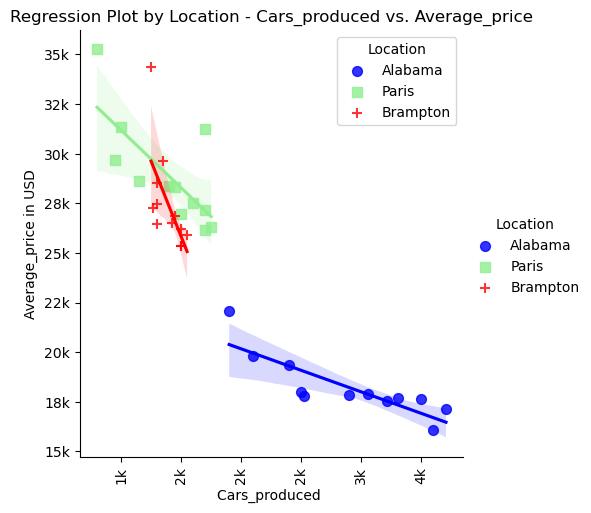

Results for Brampton:
  R-squared: 0.4313
  Slope: -15.1825
  Intercept: 48602.2528
Results for Alabama:
  R-squared: 0.7224
  Slope: -2.1682
  Intercept: 24503.5965
Results for Paris:
  R-squared: 0.5425
  Slope: -5.7967
  Intercept: 36978.1007


In [29]:
# Example usage
reg_plots('Cars_produced', 'Average_price')

<Figure size 1000x600 with 0 Axes>

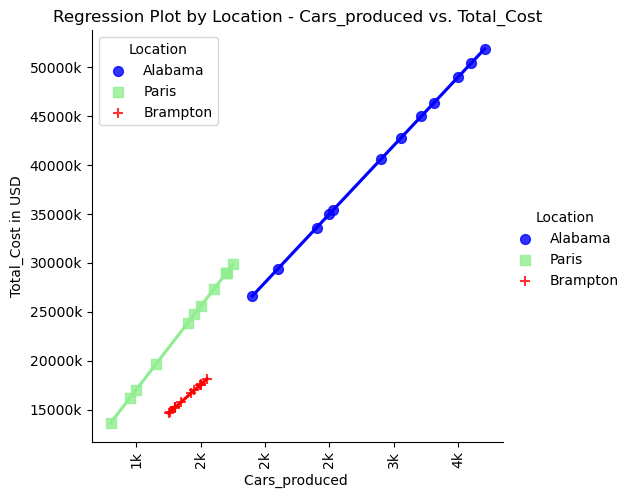

Results for Brampton:
  R-squared: 1.0000
  Slope: 11702.5000
  Intercept: 0.0000
Results for Alabama:
  R-squared: 1.0000
  Slope: 14000.0000
  Intercept: 0.0000
Results for Paris:
  R-squared: 1.0000
  Slope: 17050.0000
  Intercept: -0.0000


In [30]:
reg_plots('Cars_produced', 'Total_Cost')

<Figure size 1000x600 with 0 Axes>

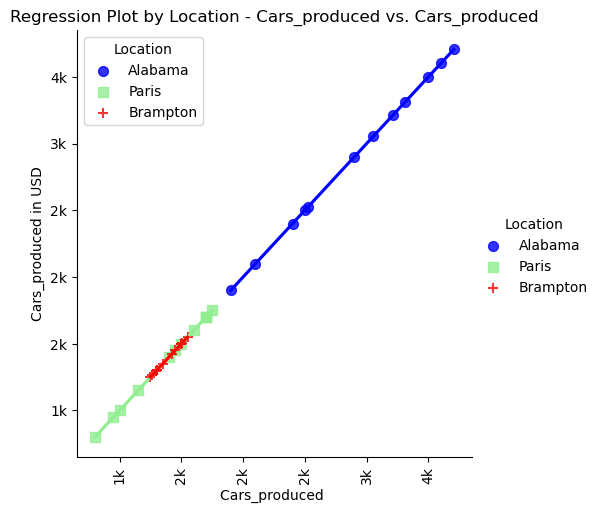

Results for Brampton:
  R-squared: 1.0000
  Slope: 1.0000
  Intercept: 0.0000
Results for Alabama:
  R-squared: 1.0000
  Slope: 1.0000
  Intercept: 0.0000
Results for Paris:
  R-squared: 1.0000
  Slope: 1.0000
  Intercept: -0.0000


In [31]:
#just for information(p)
reg_plots('Cars_produced', 'Cars_produced')

<Figure size 1000x600 with 0 Axes>

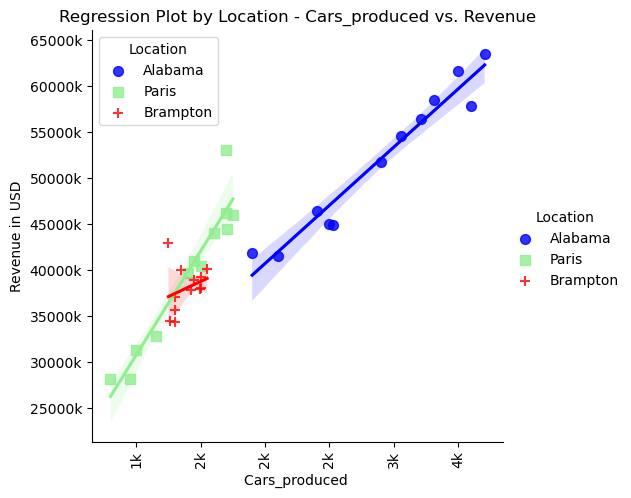

Results for Brampton:
  R-squared: 0.0817
  Slope: 6573.5799
  Intercept: 28923241.1344
Results for Alabama:
  R-squared: 0.9493
  Slope: 12648.6692
  Intercept: 15432061.6835
Results for Paris:
  R-squared: 0.9117
  Slope: 22554.5344
  Intercept: 8251952.0190


In [43]:
reg_plots('Cars_produced', 'Revenue')

<Figure size 1000x600 with 0 Axes>

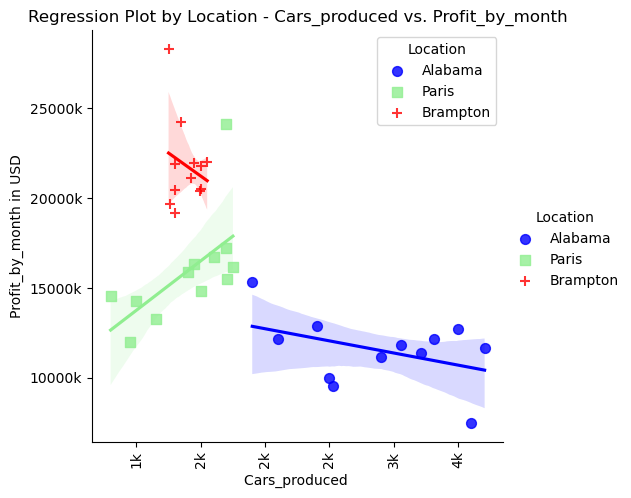

Results for Brampton:
  R-squared: 0.0514
  Slope: -5128.9201
  Intercept: 28923241.1344
Results for Alabama:
  R-squared: 0.1760
  Slope: -1351.3308
  Intercept: 15432061.6835
Results for Paris:
  R-squared: 0.3809
  Slope: 5504.5344
  Intercept: 8251952.0190


In [44]:
cnumerical_columns = ['Cars_produced', 'Average_price', 'Total_Cost', 'Revenue', 'Profit_by_month']
reg_plots('Cars_produced', 'Profit_by_month')

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming 'filterdata' is your DataFrame

def reg_Plot(x, y):
    color_palette = {'Brampton': 'red', 'Alabama': 'blue', 'Paris': 'lightgreen'}
    plt.figure(figsize=(10, 6))
    sns.lmplot(data=filterdata, x=x, y=y, hue='Location', scatter_kws={'s': 50}, markers=['o', 's', '+'], palette=color_palette)

    # Scale the x and y-axis ticks to display in thousands
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1000:.0f}k'))
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y/1000:.0f}k'))

    plt.xlabel('{} in USD'.format(x))
    plt.ylabel('{} in USD'.format(y))
    plt.title('Regression Plot by Location - {} vs. {}'.format(x, y))
    plt.legend(title='Location')
    plt.xticks(rotation=90)
    plt.show()

    # Calculate R-squared, slope, and intercept for each location's regression line
    for location in color_palette.keys():
        temp_df = filterdata[filterdata['Location'] == location]
        x_data = temp_df[x]
        y_data = temp_df[y]

        # Fit linear regression model using statsmodels
        x_data = sm.add_constant(x_data)  # Add constant term for the intercept
        model = sm.OLS(y_data, x_data).fit()

        # Get R-squared, slope, and intercept and print them
        r_squared = model.rsquared
        slope = model.params[x]
        intercept = model.params['const']

        print(f'Results for {location}:')
        print(f'  R-squared: {r_squared:.4f}')
        print(f'  Slope: {slope:.4f}')
        print(f'  Intercept: {intercept:.4f}')

<Figure size 1000x600 with 0 Axes>

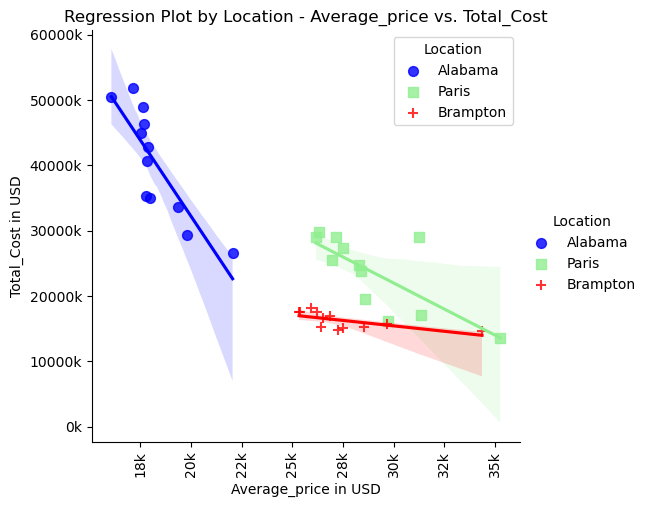

Results for Brampton:
  R-squared: 0.4313
  Slope: -332.4319
  Intercept: 25410669.2218
Results for Alabama:
  R-squared: 0.7224
  Slope: -4664.4951
  Intercept: 125536089.3277
Results for Paris:
  R-squared: 0.5425
  Slope: -1595.6972
  Intercept: 69861847.6450


In [58]:
cnumerical_columns = ['Cars_produced', 'Average_price', 'Total_Cost', 'Revenue', 'Profit_by_month']
reg_Plot('Average_price', 'Total_Cost')

<Figure size 1000x600 with 0 Axes>

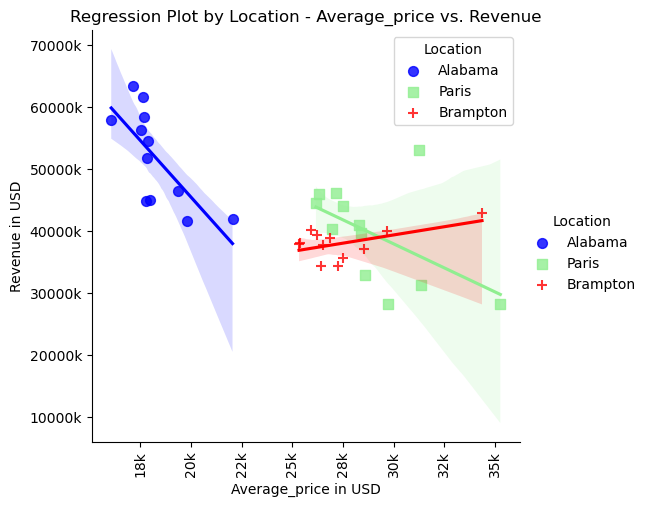

Results for Brampton:
  R-squared: 0.2851
  Slope: 531.2695
  Intercept: 23457433.7963
Results for Alabama:
  R-squared: 0.5181
  Slope: -3662.9797
  Intercept: 118799397.4926
Results for Paris:
  R-squared: 0.2678
  Slope: -1553.2501
  Intercept: 84547565.9155


In [47]:
cnumerical_columns = ['Cars_produced', 'Average_price', 'Total_Cost', 'Revenue', 'Profit_by_month']
reg_Plot('Average_price', 'Revenue')

<Figure size 1000x600 with 0 Axes>

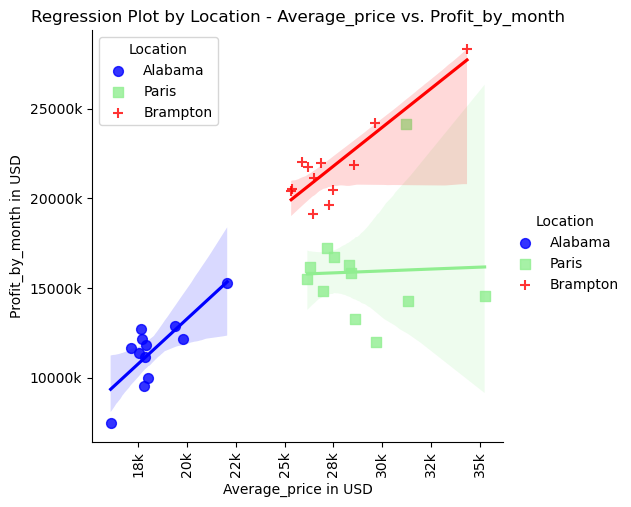

Results for Brampton:
  R-squared: 0.7783
  Slope: 863.7013
  Intercept: -1953235.4255
Results for Alabama:
  R-squared: 0.6290
  Slope: 1001.5154
  Intercept: -6736691.8352
Results for Paris:
  R-squared: 0.0014
  Slope: 42.4471
  Intercept: 14685718.2705


In [48]:
cnumerical_columns = ['Cars_produced', 'Average_price', 'Total_Cost', 'Revenue', 'Profit_by_month']
reg_Plot('Average_price', 'Profit_by_month')

<Figure size 1000x600 with 0 Axes>

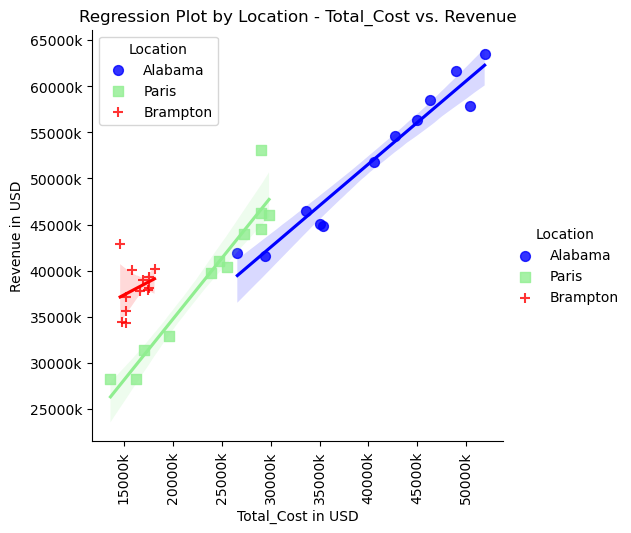

Results for Brampton:
  R-squared: 0.0817
  Slope: 0.5617
  Intercept: 28923241.1344
Results for Alabama:
  R-squared: 0.9493
  Slope: 0.9035
  Intercept: 15432061.6835
Results for Paris:
  R-squared: 0.9117
  Slope: 1.3228
  Intercept: 8251952.0190


In [49]:
cnumerical_columns = ['Cars_produced', 'Average_price', 'Total_Cost', 'Revenue', 'Profit_by_month']
reg_Plot('Total_Cost', 'Revenue')

<Figure size 1000x600 with 0 Axes>

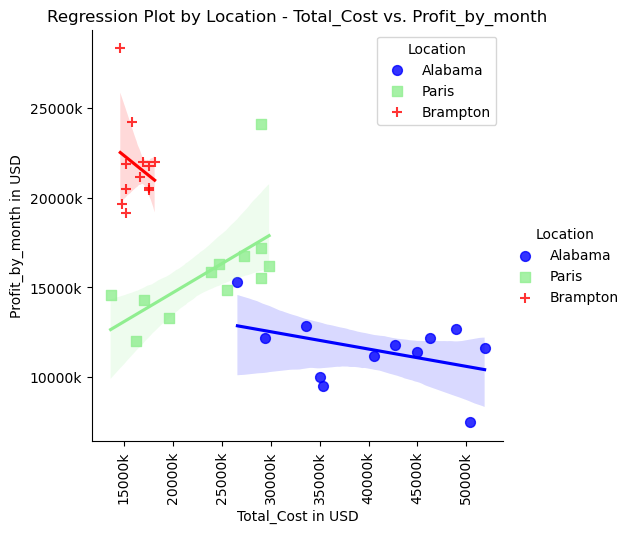

Results for Brampton:
  R-squared: 0.0514
  Slope: -0.4383
  Intercept: 28923241.1344
Results for Alabama:
  R-squared: 0.1760
  Slope: -0.0965
  Intercept: 15432061.6835
Results for Paris:
  R-squared: 0.3809
  Slope: 0.3228
  Intercept: 8251952.0190


In [50]:
cnumerical_columns = ['Cars_produced', 'Average_price', 'Total_Cost', 'Revenue', 'Profit_by_month']
reg_Plot('Total_Cost', 'Profit_by_month')

<Figure size 1000x600 with 0 Axes>

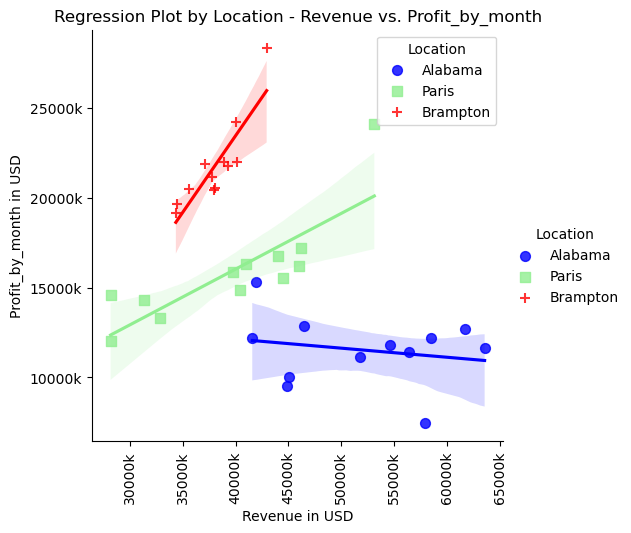

Results for Brampton:
  R-squared: 0.7545
  Slope: 0.8546
  Intercept: -10737989.2601
Results for Alabama:
  R-squared: 0.0417
  Slope: -0.0507
  Intercept: 14159910.7539
Results for Paris:
  R-squared: 0.6775
  Slope: 0.3108
  Intercept: 3593361.9745


In [51]:
cnumerical_columns = ['Cars_produced', 'Average_price', 'Total_Cost', 'Revenue', 'Profit_by_month']
reg_Plot('Revenue', 'Profit_by_month')

In [52]:
filterdata.columns

Index(['Cars_produced', 'Date', 'Location', 'Average_price',
       'Cost_of_Production', 'Total_Cost', 'Revenue', 'Profit_by_month'],
      dtype='object')

In [53]:
costofcar = filterdata[['Location','Cost_of_Production']].drop_duplicates()
costofcar

,Location,Cost_of_Production
0,Alabama,14000.0
12,Paris,17050.0
24,Brampton,11702.5


In [54]:
color_palette = {'Brampton': 'red', 'Alabama': 'blue', 'Paris': 'lightgreen'}

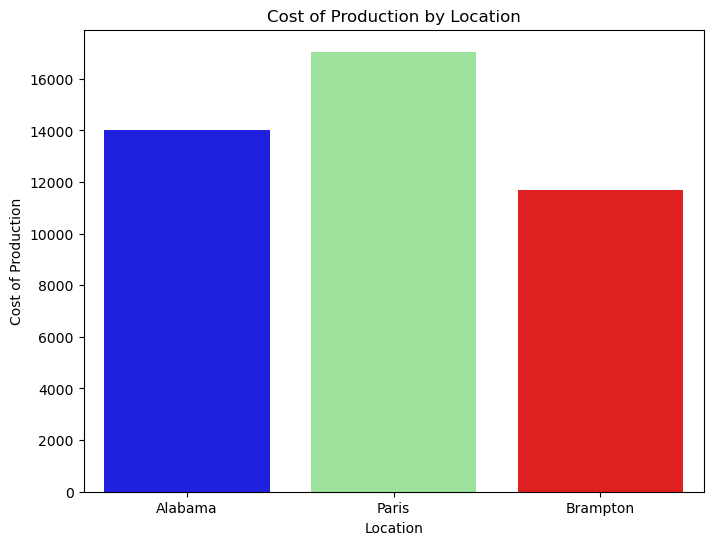

In [55]:
plt.figure(figsize=(8, 6))
sns.barplot(data=costofcar, x='Location', y='Cost_of_Production', palette=[color_palette[loc] for loc in costofcar['Location']])
plt.title('Cost of Production by Location')
plt.xlabel('Location')
plt.ylabel('Cost of Production')
plt.show()